##Yuri Santana Lopes - 222009750

##Importação das bibliotecas e inserção do arquivo

**Importante!***
As células de importação e de carregamento de arquivo devem ser executadas para que o projeto funcione

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [27]:
#Primeiramente, carregamos o arquivo do drive

file_id = "1osZhWfDIO7LcOoMl8Wq17oJcptXkoIpf"
url = f"https://drive.google.com/file/d/{file_id}/view"

In [28]:
file_id = "1osZhWfDIO7LcOoMl8Wq17oJcptXkoIpf"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
redwine = pd.read_csv(download_url, sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Buscar os valores nulos dentro do dataset
É necessário fazer a análise inicial do dataset para verificar se existem ou não valores nulos e outliers neles. Isso serve para conseguirmos ter melhores resultados no treinamento que será realizado com este modelo de dados.

In [29]:
print("The null values are:",redwine.isnull().sum())

The null values are: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


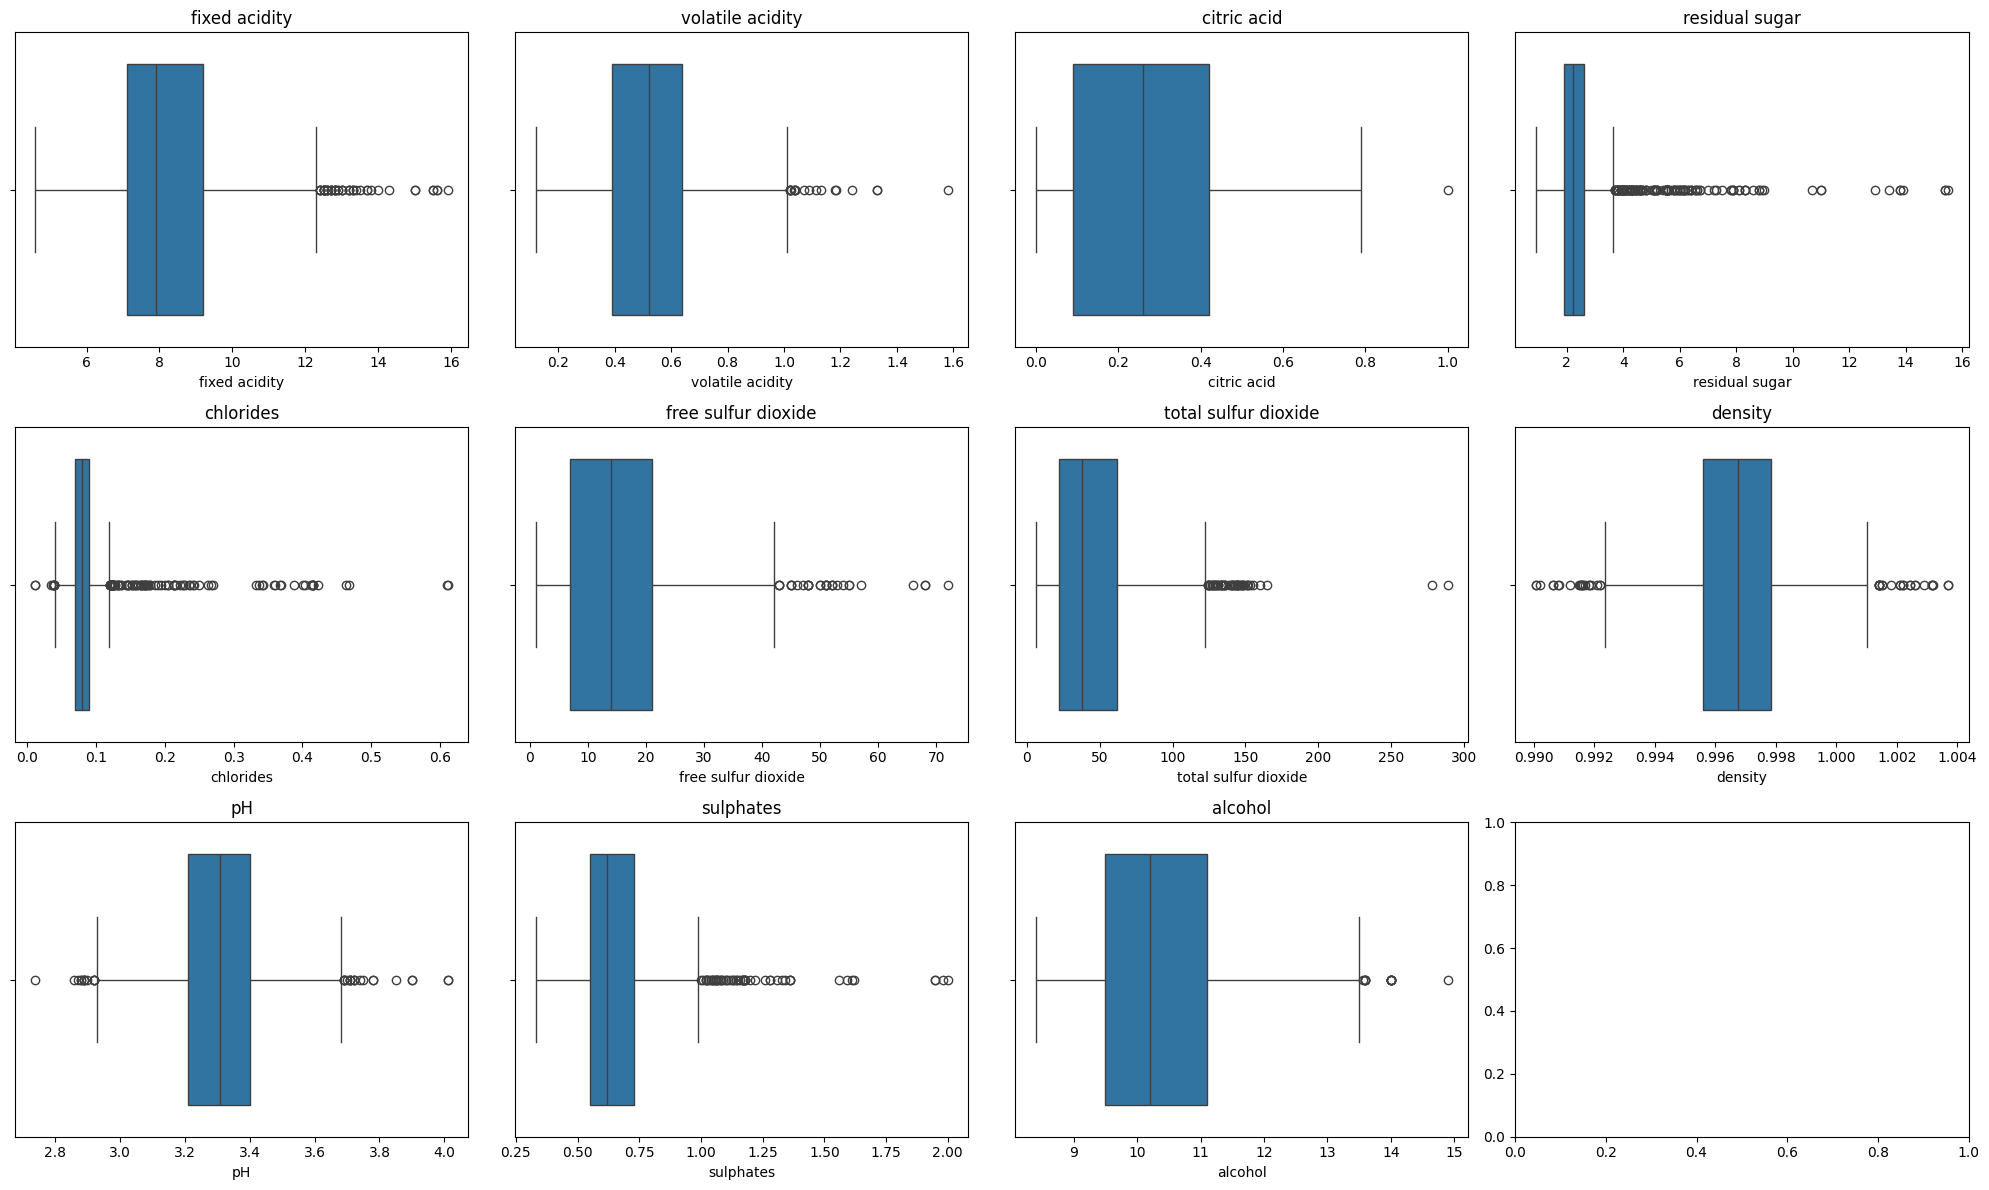

In [30]:
def plot_outliers_values(redwine):
  num_cols = len(redwine.columns) - 1
  cols = 4
  rows = (num_cols + cols - 1) // cols

  fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
  axes = axes.flatten()

  for idx,col in enumerate(redwine.columns[:-1]):
      sns.boxplot(x=redwine[col],ax = axes[idx])
      axes[idx].set_title(col)

  plt.tight_layout()
  plt.show()
plot_outliers_values(redwine)

Identificamos que existem valores Outliers presentes no nosso Dataset. Entretanto, se nós quisermos continuar trabalhando com esse dataset da devida maneira, primeiro precisamos fazer o tratamento desses dados
#Tratamento de Outliers

Aqui a minha ideia foi de utilizar o algoritmo de IQR para a remoção dos Outliers, assim podendo obter uma análise em que apresenta resultados mais condizentes com os dados em que foram usados de treinamento.

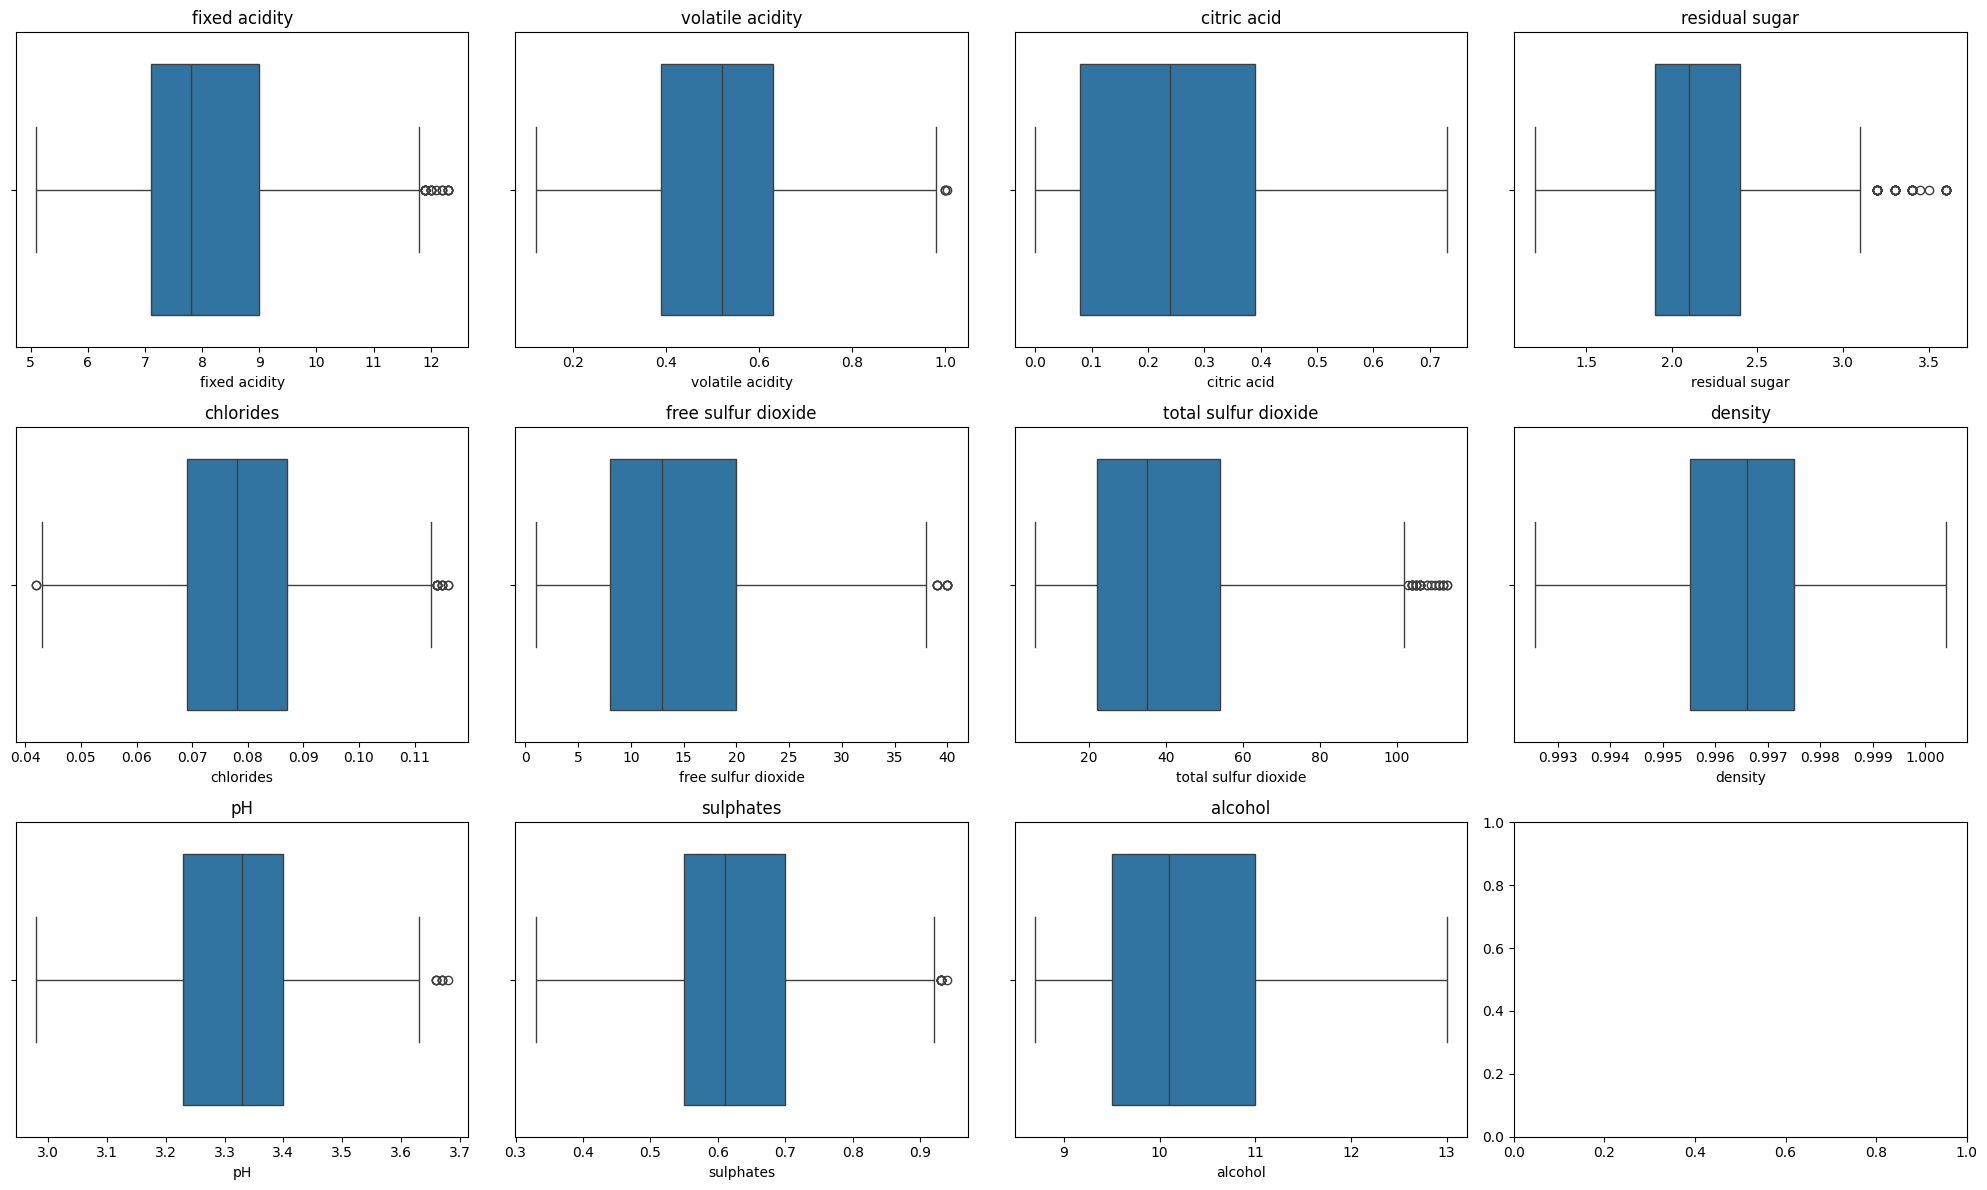

In [31]:
def tratamentoOutliers(red):
  for column in red.columns[:-1]:
    Q1 = red[column].quantile(0.25)
    Q3 = red[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5* IQR
    upper_limit = Q3 + 1.5* IQR
    red = red[(red[column] >= lower_limit) & (red[column] <= upper_limit)]
  return red

redWineTreated = tratamentoOutliers(redwine)
plot_outliers_values(redWineTreated)

##Processamento e tratamento de dados

In [32]:
# Definindo as variáveis de entrada e saída que serão utlizadas.
X = redWineTreated.drop('quality', axis=1)
y = redWineTreated['quality']

# Convertendo a saída para classificação binária (exemplo: qualidade >= 6 é 1, senão 0)
y_binary = (y >= 6).astype(int)

#  Em seguida realizar a Normalização dos dados.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separação dos dados
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)


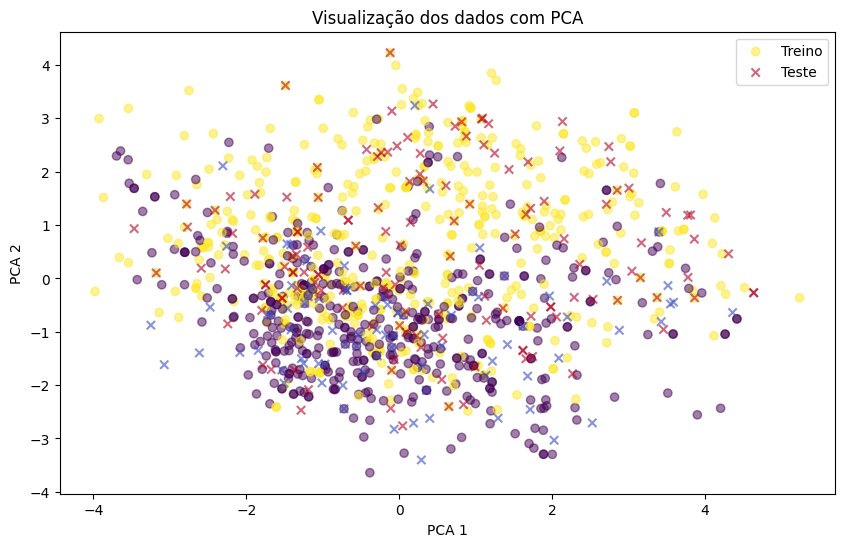

In [33]:
#Aplicar o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis',label='Treino', alpha=0.5)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap='coolwarm', label='Teste', marker='x', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualização dos dados com PCA')
plt.legend()
plt.show()

In [34]:
clf = RandomForestClassifier()
clf.fit(x_train_pca, y_train)

y_pred = clf.predict(x_test_pca)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.71      0.64        86
           1       0.80      0.70      0.74       141

    accuracy                           0.70       227
   macro avg       0.69      0.70      0.69       227
weighted avg       0.72      0.70      0.70       227



#Análise conclusiva:
Notou-se que a precisão para o 0 ficou bem menor do que a precisão para 1. Talvez isso possa ter acontecido em razão da remoção dos outliers.
Além desta discrepância entre as classes 0 e 1, o desequilíbrio entre as classes após a conversão binária da variável quality pode ter influenciado bastante no desempenho do moelo, e de tal maneira a privilegiar a classe 1.
A remoção dos outliers beneficiou a qualidade dos dados, mas em compensação o treinamento não ficou tão bom assim para a classe 0.
Isso é um fenomeno que observei também no teste2, portanto estou considerando no futuro de adotar uma outra estratégia para o tratamento dos outliers.

Outro fator é que talvez a redimensinalização do PCA pode ter facilitado a visualização, mas talvez parte das variâncias esperadas pode ter sido perdida, o que também impacta o modelo como um todo.